In [ ]:
# %%
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
# Ensure reproducibility
tf.keras.utils.set_random_seed(313)
tf.config.experimental.enable_op_determinism()


i1_ = np.loadtxt('compoundARaw.txt')
i2_ = np.loadtxt('substrateRaw.txt')
t1_ = np.loadtxt('biomassRaw.txt')

genBorder = 1600

i1Data = i1_[0:genBorder]
i1Hid = i1_[genBorder:2000]
i2Data = i2_[0:genBorder]
i2Hid = i2_[genBorder:2000]
t1Data = t1_[0:genBorder]
t1Hid = t1_[genBorder:2000]

np.savetxt("compoundA.txt", i1Data)
np.savetxt("substrate.txt", i2Data)
np.savetxt("biomass.txt", t1Data)

np.savetxt("hidden_compoundA.txt", i1Hid)
np.savetxt("hidden_substrate.txt", i2Hid)
np.savetxt("hidden_biomass.txt", t1Hid)

In [20]:
# Load primary dataset
i1 = np.loadtxt("compoundA.txt")
i2 = np.loadtxt("substrate.txt")
t1 = np.loadtxt("biomass.txt")

# Preprocessing: clamp negatives to zero
i2 = np.clip(i2, 0, None)
t1 = np.clip(t1, 0, None)

# Stack features
X = np.vstack((i1, i2)).T
y = t1

In [21]:
# min_input=np.min(X, axis=0)
# max_input=np.max(X, axis=0)
# # Normalize the input features (Compound A and Substrate)
# X_normalized = (X - min_input) / (max_input - min_input)


# Split into train (60%), validation (20%), test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=313)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=313
)

print(
    f"Train samples: {len(y_train)}, Validation samples: {len(y_val)}, Test samples: {len(y_test)}"
)

Train samples: 960, Validation samples: 320, Test samples: 320


In [22]:
# Number of samples to plot
plot_samples = 50

# Build neural network
nnet = Sequential(
    [
        Input(shape=(2,)),  # Input layer with 2 features
        Dense(5, input_dim=2, activation="tanh"),
        # nnet.add(Dense(8,input_dim=2,activation='tanh'),
        # nnet.add(Dense(4, activation='tanh'),
        Dense(1, activation="linear"),
    ]
)
nnet.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.01))

# Early stopping on validation loss
es = EarlyStopping(
    monitor="val_loss", mode="min", patience=10, restore_best_weights=True
)

e:\Master Degree\Master of Information Technology\25T2_8543_MIT\COMP9414 - Artificial Intelligence\.conda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


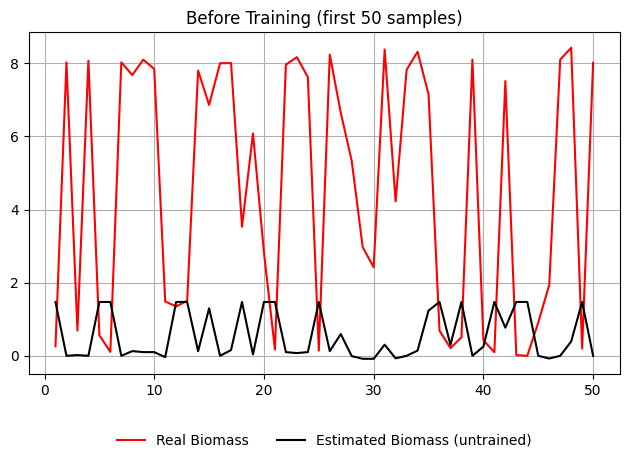

In [23]:
# Initial prediction before training
y_pred_init = nnet.predict(X_test)
# Plot only first plot_samples
n_plot = min(plot_samples, len(y_test))
x = np.arange(1, n_plot + 1)
plt.figure()
plt.plot(x, y_test[:n_plot], "r-", label="Real Biomass")
plt.plot(x, y_pred_init[:n_plot], "k-", label="Estimated Biomass (untrained)")
plt.title(f"Before Training (first {n_plot} samples)")
plt.legend()
plt.grid()
plt.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.25),
    ncol=2,
    frameon=False,
)
plt.tight_layout()
plt.show()

Epoch 1/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 27.6771 - val_loss: 20.9841
Epoch 2/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.1018 - val_loss: 14.4182
Epoch 3/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.0451 - val_loss: 9.7837
Epoch 4/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9184 - val_loss: 6.8585
Epoch 5/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3102 - val_loss: 4.9921
Epoch 6/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6069 - val_loss: 3.7136
Epoch 7/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4120 - val_loss: 2.6510
Epoch 8/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3931 - val_loss: 1.9051
Epoch 9/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7130 - val_loss: 1.3799
Epoch 10/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2231 - val_loss: 0.9878
Epoch 11/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8627 - val_loss: 0.6970
Epoch 12/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5984 - v

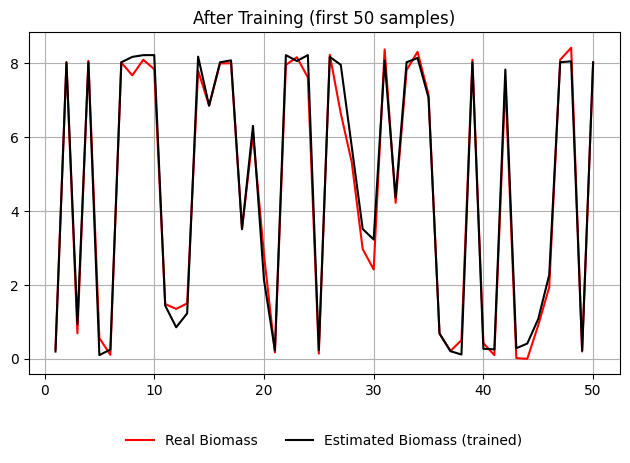

In [24]:
# Train model
history = nnet.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=70,
    batch_size=32,
    callbacks=[es],
    verbose=1,
)

# Prediction after training
y_pred = nnet.predict(X_test)
# Plot only first plot_samples
n_plot = min(plot_samples, len(y_test))
x = np.arange(1, n_plot + 1)
plt.figure()
plt.plot(x, y_test[:n_plot], "r-", label="Real Biomass")
plt.plot(x, y_pred[:n_plot], "k-", label="Estimated Biomass (trained)")
plt.title(f"After Training (first {n_plot} samples)")
plt.legend()
plt.grid()
plt.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.25),
    ncol=2,
    frameon=False,
)
plt.tight_layout()
plt.show()

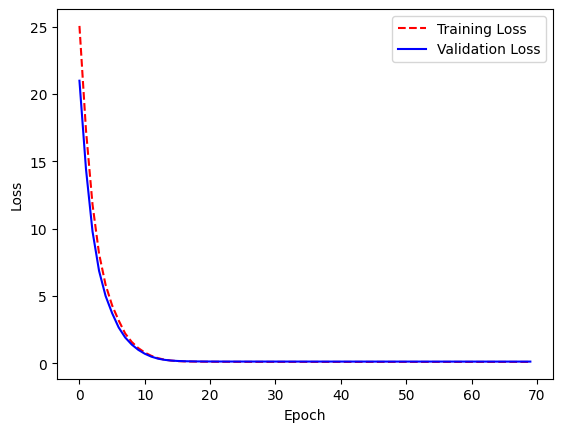

In [25]:
# Plot training vs validation loss
plt.figure()
plt.plot(history.history["loss"], "r--", label="Training Loss")
plt.plot(history.history["val_loss"], "b-", label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


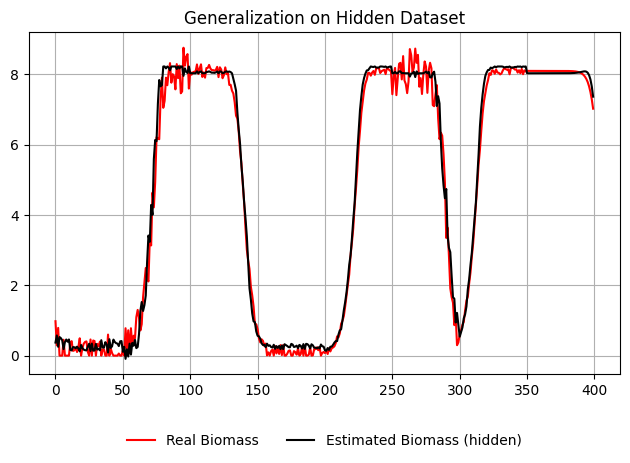

In [26]:
# Load hidden evaluation dataset
i1_hid = np.loadtxt("hidden_compoundA.txt")
i2_hid = np.loadtxt("hidden_substrate.txt")
t1_hid = np.loadtxt("hidden_biomass.txt")

# Preprocess hidden dataset
i2_hid = np.clip(i2_hid, 0, None)
t1_hid = np.clip(t1_hid, 0, None)
X_hid = np.vstack((i1_hid, i2_hid)).T

# Evaluate model on hidden dataset
y_pred_hid = nnet.predict(X_hid)
plt.figure()
plt.plot(t1_hid, "r-", label="Real Biomass")
plt.plot(y_pred_hid, "k-", label="Estimated Biomass (hidden)")
plt.title("Generalization on Hidden Dataset")
plt.legend()
plt.grid()
plt.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.25),
    ncol=2,
    frameon=False,
)
plt.tight_layout()
plt.show()

In [27]:
# Compute metrics on hidden set
om = np.mean(t1_hid)
num = np.sum((t1_hid - y_pred_hid[:, 0]) ** 2)
iaden = np.sum((np.abs(t1_hid - om) + np.abs(y_pred_hid[:, 0] - om)) ** 2)
rmsden = np.sum(t1_hid**2)
IA = 1 - num / iaden
RMS = np.sqrt(num / rmsden)
RSD = np.sqrt(num / len(t1_hid))
# descriptive metric names
print(f"Index of Agreement (IA)                 : {IA:.4f}")
print(f"Normalized Root-Mean-Square Error (RMS) : {RMS:.4f}")
print(f"Root-Mean-Square Deviation (RSD)        : {RSD:.4f}")

Index of Agreement (IA)                 : 0.9973
Normalized Root-Mean-Square Error (RMS) : 0.0635
Root-Mean-Square Deviation (RSD)        : 0.3717
